In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

## Part 1: Regression

**Introduction**

In this regression task, we will use a superconductor dataset obtained from the UCI ML repository which was created by Kam Hamidieh and uploaded on 10/11/2018. This dataset focuses on superconductors which are materials capable of conducting electrical current with little to no resistance. Superconductors play an crucial role in many technologies and their applications in applied fields are very important. These applications include magnetic resonance imaging (MRI), electricity transportation, particle accelerators, and many more. However, it is important to note that superconductive materials only exhibit the ability to conduct electrical current with low/zero resistance only at or below the material's critical temperature $(T_C)$. Thus, understanding the properties that determine a superconductor's critical temperature is essential.

The main goal of this section is to develop a model to predict the critical temperature $(T_C)$ of a superconductor based only on the most important features available in the dataset. The 81 features in the dataset are derived from 8 main physical/chemcial properties of the material, with each property further represented by 10 statistical measures. The structure is given below:

| Variable                | Description    |
|:------------------------|:-------------------------------------------------------|
| Atomic Mass             | total proton and neutron rest masses                   |
| First Ionization Energy | energy requried to remove a valence electron           |
| Atomic Radius           | calculated atomic radius                               |
| Density                 | density at standard temperature and pressure           |
| Electron Affinity       | energy required to add an electron to a neutral atom   |
| Fusion Heat             | energy to change from solid to liquid without temperature change |
| Thermal Conductivity    | thermal conductivity coefficient                       |
| Valence                 | number of chemcial bonds formed by the element         |


For each variable listed above, the dataset contains a statistical measure associated given by the table below:

| Statistical Measurement |
|:------------------------|
| Mean |
| Weighted Mean |
| Geometric Mean |
| Weighted Geometric Mean |
| Entropy |
| Weighted Entropy |
| Range |
| Weighted Range |
| Standard Deviation |
| Weighted Standard Deviation |

**Importing Dataset and Cleaning**

In [2]:
# import the dataset
sc_data = pd.read_csv("/Users/andy/Desktop/CMSE381/datasets/superconductivty_data/train.csv")
sc_data.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


After importing the data and viewing the dataframe, we can see that the data consists of 21263 superconductor observations.

In [3]:
# check for any missing/null values
sc_data.isnull().values.any()

False

In [4]:
sc_data.dtypes

number_of_elements         int64
mean_atomic_mass         float64
wtd_mean_atomic_mass     float64
gmean_atomic_mass        float64
wtd_gmean_atomic_mass    float64
                          ...   
range_Valence              int64
wtd_range_Valence        float64
std_Valence              float64
wtd_std_Valence          float64
critical_temp            float64
Length: 82, dtype: object

No cleaning is necessary as the data contains no missing/null values. All variables are the correct datatypes (int64 or float64) for our regression task so no changes need to be made to the datatypes. There are no categorical/binary variable data so no dummy variables processing is needed. The data subsetting for target variable and explanatory variables will be done in the model implementation step (so nothing needs to be done here). 

**Model Implementation**

We will begin by building a baseline regression model using all 81 features in the dataset. This baseline will serve as a performance benchmark, helping us understand the predictive potential of a model that utilizes the entire feature set. Following this, we will apply Principal Component Analysis (PCA) to reduce the dimensionality of the data. By retaining only the most significant principal components, we aim to simplify the feature set while preserving the majority of the variance. These principal components will then be used as inputs in a Principal Component Regression (PCR) model, which we will compare to the baseline to assess the impact of dimensionality reduction.

**Baseline Model (all 81 features)**

To create the baseline model, we use `LinearRegression()` and evaluate its performance through `k-fold CV`. We use the Mean Squared Error obtained from this model as the baseline model's evaluation metric.

In [5]:
# define variables
y = sc_data['critical_temp']
X = sc_data.drop(['critical_temp'], axis = 1)

# create model and perform k-fold cross validation
model = LinearRegression()
kf = KFold(n_splits=5)
scores = cross_val_score(model, X, y, 
                         scoring='neg_mean_squared_error',
                         cv=kf)
MSE_baseline = np.average(np.absolute(scores))
print(f"Baseline Mean Squared Error: {MSE_baseline}")

Baseline Mean Squared Error: 358.3876136966697


**Principal Component Analysis / Principal Component Regression**

We start by standardizing and transforming the 81 original features into principal components using `PCA`. These principal components are then fed into the `LinearRegression()` model one at a time. For each component, we evaluate the model's performance using `k-fold CV`. After all principal components are used, we can plot the MSE values attained for each component and determine the optimal number of components to use in the regression model.

In [6]:
# define variables
y = sc_data['critical_temp']
X = sc_data.drop(['critical_temp'], axis = 1)

# standarize and transform features using PCA
pca = PCA()
X_PC = pca.fit_transform(scale(X))

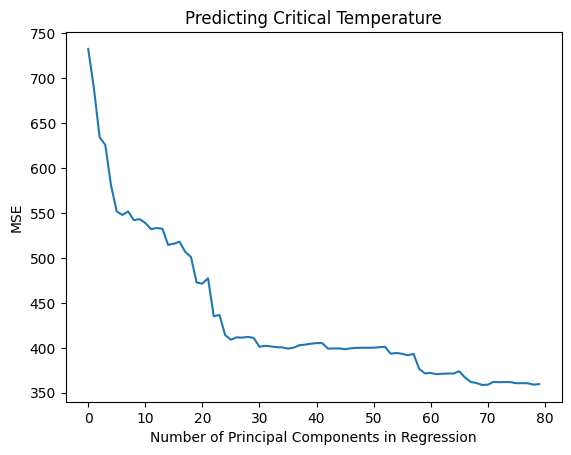

In [7]:
n = X_PC.shape[1] # 81 prinical components
model = LinearRegression()
mse = []

# calculate MSE using k-fold CV for all principle components, adding one component at a time
for i in np.arange(1, n):
    kf = KFold(n_splits=5)
        
    scores = cross_val_score(model, X_PC[:,:i], y, 
                            scoring='neg_mean_squared_error',
                            cv=kf)

    score = np.average(np.absolute(scores))

    mse.append(score)
    
# Plot results    
plt.plot(mse)
plt.xlabel('Number of Principal Components in Regression')
plt.ylabel('MSE')
plt.title('Predicting Critical Temperature')
plt.show()

Looking at the plot of Number of Principal Components vs MSE, we can observe that the MSE decreases as the number of principal components increase. This is expected as additional principal components allow the model to capture more variance from the feature set, inproving the model's ability to explain the target variable (critical temperature). However, we can observe that after a certain number of principal components used in the regression model, the improvement in the MSE stabilizes, which indicates that adding additional components to the model contribute little to the predictive accuracy.

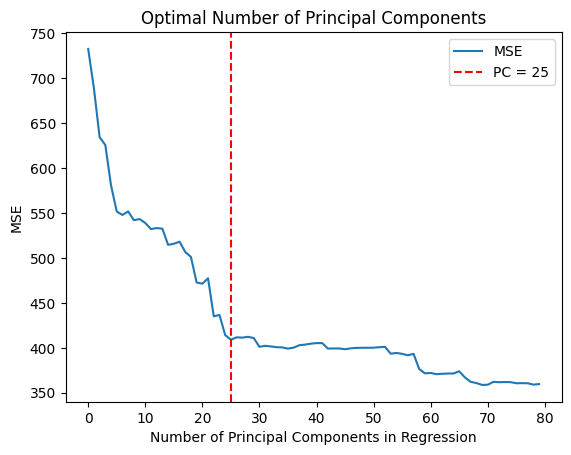

In [8]:
plt.plot(mse, label='MSE')
plt.axvline(x=25, color='red', linestyle='--', label='PC = 25')
plt.xlabel('Number of Principal Components in Regression')
plt.ylabel('MSE')
plt.title('Optimal Number of Principal Components')
plt.legend()
plt.show()

There are many different options for the optimal number of principal components to use in the model, but after some careful analysis, we determined that stabilization occurs when the number of principal components used in regression is 25 (plotted above). The models which use more than 25 PCs result in minimal MSE reduction. Using 25 principal components for the model creates a balance between reducing dimensionality and maintaining predictive performance.

**Analysis**

To evaluate the performance of our regression models, we can compare the Baseline model to the PCR model using their mean squared error.

In [9]:
# baseline MSE
print(f"Baseline Mean Squared Error: {MSE_baseline}")

Baseline Mean Squared Error: 358.3876136966697


In [10]:
# create PCR model and perform k-fold cross validation
model = LinearRegression()
kf = KFold(n_splits=5)
scores = cross_val_score(model, X_PC[:,:25], y,
                         scoring='neg_mean_squared_error',
                         cv=kf)
MSE_25PC = np.average(np.absolute(scores))
print(f"25 Principal Components Mean Squared Error: {MSE_25PC}")

25 Principal Components Mean Squared Error: 414.2514989907294


The baseline model which uses all 81 features in the dataset results in a MSE of 358.39. The PCR model which uses only the first 25 principal components results in a MSE of 414.25. If we strictly consider the MSE, the baseline model has a lower MSE which suggests that using all 81 features allows the model to predict the critical temperature $T_C$ more accurately. However, this comes with the cost of increased model complexity and high dimensionality. If we look at the PCR model, it offers a significant reduction in dimensionalty as it only uses 25 components instead of 81 features. This feature reduction simplifies the model, allowing it to be less complex and less prone to overfitting. Although the MSE of the PCR model is slightly higher, the trade-off is justified as we are able to create a lower dimensional model without a substantial loss in accuracy.

To get a better understanding of how well each model performs, we can create a scatter plot of actual vs predicited critical temperature for both the baseline and PCR models.

In [11]:
# baseline model
baseline_model = LinearRegression()
baseline_model.fit(X, y)
y_pred_baseline = baseline_model.predict(X)

# PCR model
pcr_model = LinearRegression()
pcr_model.fit(X_PC[:,:25], y)
y_pred_pcr = pcr_model.predict(X_PC[:,:25])

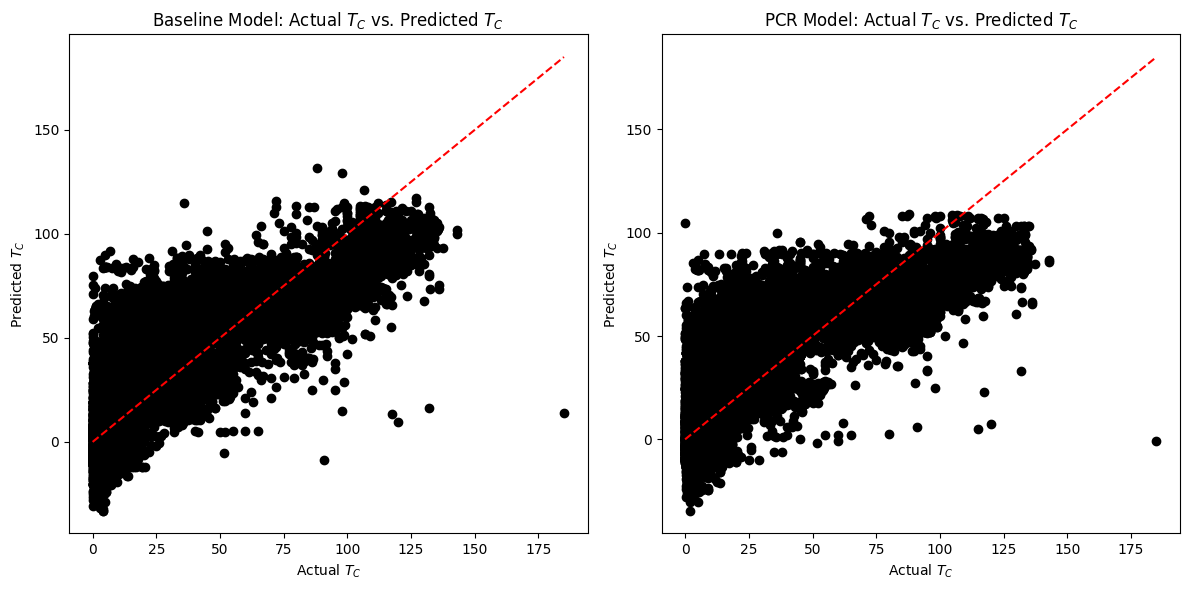

In [12]:
plt.figure(figsize=(12, 6))

# scatterplot for baseline model
plt.subplot(1, 2, 1)
plt.scatter(y, y_pred_baseline, color='black')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Diagonal line
plt.xlabel("Actual $T_C$")
plt.ylabel("Predicted $T_C$")
plt.title("Baseline Model: Actual $T_C$ vs. Predicted $T_C$")

# scatterplot for PCR model
plt.subplot(1, 2, 2)
plt.scatter(y, y_pred_pcr, color='black')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Diagonal line
plt.xlabel("Actual $T_C$")
plt.ylabel("Predicted $T_C$")
plt.title("PCR Model: Actual $T_C$ vs. Predicted $T_C$")

plt.tight_layout()
plt.show()

Looking at the scatterplots of actual $T_C$ vs predicted $T_C$ for both the baseline and PCR models, we can see that for both models, the predicted values are close to the actual values and the data points are scattered closely around the diagonal line (which represents Predicted = Actual). These patterns suggest that both models are performing farily well in predicting critical temperature. Note that the PCR model which uses only 25 principal components is very similar to the baseline model which uses all 81 features in terms of predictive performance. This indicates that dimensionality reduction through PCA has not negatively impacted the model's ablity to predict the critical temperature. The PCR model has captured the only the most important and relevant features, thus making the PCR model less complex with similar predictive performance.

## Part 2: Classification

**Introduction**

In this classification task, we will use the occupancy detection data which was created by Luis Candanedo and uploaded on 2/28/2016. This data consists of one training dataset which has 8143 observations and two testing datasets which have 2665 and 9752 observations respectively. The first testing set consists of measurements taken with the door mostly closed during occupied status and the second testing set consists of measurements taken with the door mostly open during occupied status. The data was gathered from office rooms of dimension 5.85m$\times$3.50m$\times$3.53m using a microcontroller to gather information on the following variables:

| Variable              | Description    |
|:----------------------|:-------------------------------------------------------|
| Temperature           | room temperature measured in $^\circ\text{C}$          |
| Humidity              | relative humidity of the room, expressed as a percentage |
| Light                 | illuminance level in the room measured in Lux          |
| CO2                   | carbon dioxide concentration in room measured in ppm   |
| Humidity Ratio        | ratio of water vapor to dry air in the room, measured in $kg_w/kg_{da}$ |

A digital camera was installed in the rooms to monitor occupancy, recording whether the room was non-occupied (0) or occupied (1). This binary information is stored in the Occupancy column of the dataset.

Occupancy detection plays a critical role in optimizing HVAC control systems, enabling more energy-efficient operation by adjusting heating, cooling, and ventilation based on real-time occupancy. Beyond energy savings, occupancy detection has diverse applications, including enhancing building security, improving space utilization, and gaining insights into occupant behavior patterns for better building design and management.

The main goal of this section is to develop a model to predict the occupancy of a given room based on the sensor data. We will use a Random Forest Classifier as the baseline performance model, then refine the model by optimizing its parameters to improve efficiency and accuracy.

**Importing Data and Cleaning**

In [13]:
# import train data
occupancy_data_train = pd.read_csv('/Users/andy/Desktop/CMSE381/datasets/occupancy_detection_data/datatraining.txt')

# import test1 data
occupancy_data_test1 = pd.read_csv('/Users/andy/Desktop/CMSE381/datasets/occupancy_detection_data/datatest.txt')

# import test2 data
occupancy_data_test2 = pd.read_csv('/Users/andy/Desktop/CMSE381/datasets/occupancy_detection_data/datatest2.txt')

In [14]:
# drop date column
occupancy_data_train = occupancy_data_train.drop('date', axis=1)
occupancy_data_test1 = occupancy_data_test1.drop('date', axis=1)
occupancy_data_test2 = occupancy_data_test2.drop('date', axis=1)

# cleaned dataset
occupancy_data_train.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,23.18,27.2720,426.0,721.25,0.004793,1
2,23.15,27.2675,429.5,714.00,0.004783,1
3,23.15,27.2450,426.0,713.50,0.004779,1
4,23.15,27.2000,426.0,708.25,0.004772,1
5,23.10,27.2000,426.0,704.50,0.004757,1


In [15]:
occupancy_data_train.dtypes

Temperature      float64
Humidity         float64
Light            float64
CO2              float64
HumidityRatio    float64
Occupancy          int64
dtype: object

After importing the training and testing datasets, the only cleaning we need to do is remove the date column as it is not directly relevant to predicting occupancy. Every other variable is in the correct datatype for our classification task (float64 or int64) so no changes to the datatypes need to be made. The explanatory variables are not categorical/binary so dummy variable processing doesn't need to be done. Defining the target and explanatory variables will be done in the model implementation step (so nothing needs to be done currently).

**Model Implementation**

To begin the classification task, we will create a Random Forest Classifier using the default number of estimators and all the variables captured by the sensor data. This allows us to to establish a baseline performance model for predicting room occupancy. We can then improve the Random Forest Classifier by optimizing the key hyperparameters which include the number of estimators (n_estimators) and the maxiumum number of features (max_features).

**Baseline Model - Random Forest Classifier (default number of estimators, all 5 features)**

To create the baseline model, we will train the `RandomForestClassifier()` with all variables `(max_features=5)` and the default number of estimators `(n_estimators=100)` using the training dataset. We then can make predictions on the testing datasets to evaulate the accuracy of the model.

In [16]:
# define train variables
y_train = occupancy_data_train['Occupancy']
X_train = occupancy_data_train.drop(['Occupancy'], axis = 1)

# define test variables
y_test1 = occupancy_data_test1['Occupancy']
X_test1 = occupancy_data_test1.drop(['Occupancy'], axis = 1)

y_test2 = occupancy_data_test2['Occupancy']
X_test2 = occupancy_data_test2.drop(['Occupancy'], axis = 1)

# create Random Forest Classifier (baseline)
rf_baseline = RandomForestClassifier(max_features=5, n_estimators=100, random_state=1)
rf_baseline.fit(X_train, y_train)

# make predictions on testing data
y_pred1 = rf_baseline.predict(X_test1)
y_pred2 = rf_baseline.predict(X_test2)

# calculate accuracy
accuracy_test1 = accuracy_score(y_test1, y_pred1)
accuracy_test2 = accuracy_score(y_test2, y_pred2)

print(f"Test 1 Accuracy: {accuracy_test1}")
print(f"Test 2 Accuracy: {accuracy_test2}")

Test 1 Accuracy: 0.9362101313320825
Test 2 Accuracy: 0.9653404429860541


**Optimized Random Forest Classifier**

In order to optimize the baseline model, we need to tune they key hyperparmeters, `n_estimators` (the number of trees in the forest) and `max_features` (maximum number of features used). By exploring different combinations of these parameters, we can find the balance between predictive performance/accuracy and model complexity which lead to an optimal Random Forest Classifier model.

The values we will explore for `max_features` will be `sqrt(features)` (square root of the number of features) and `features` (all features).

The values we will explore for `n_estimators` will range from `10 to 200`.

For each choice of `max_features` and `n_estimators`, we can plot the error to see how the choices of hyperparameters affects the model.

In [17]:
# error for test set 1
# define variables and create test error 1 list
p = 5
m_list = [int(np.sqrt(p)), int(p)]
n_tree_list = np.arange(10,201,10)
Errors_1 = []

# loop to explore max_features and n_estimators
for m in m_list:
    M_error = []
    for i in range(len(n_tree_list)):
        n_trees = n_tree_list[i]

        random_forest = RandomForestClassifier(n_estimators = n_trees,
                                               max_features = m,
                                               random_state=1)
        
        random_forest.fit(X_train, y_train)
        
        y_pred1 = random_forest.predict(X_test1)
        
        error_test1 = 1 - accuracy_score(y_test1, y_pred1)
        
        M_error.append(error_test1)
        
    Errors_1.append(np.array(M_error))

In [18]:
# error for test set 2
# define variables and create test error 2 list
p = 5
m_list = [int(np.sqrt(p)), int(p)]
n_tree_list = np.arange(10,201,10)
Errors_2 = []

# loop to explore max_features and n_estimators
for m in m_list:
    M_error = []
    for i in range(len(n_tree_list)):
        n_trees = n_tree_list[i]

        random_forest = RandomForestClassifier(n_estimators = n_trees,
                                               max_features = m,
                                               random_state=1)
        
        random_forest.fit(X_train, y_train)
        
        y_pred2 = random_forest.predict(X_test2)
        
        error_test2 = 1 - accuracy_score(y_test2, y_pred2)
        
        M_error.append(error_test2)
        
    Errors_2.append(np.array(M_error))

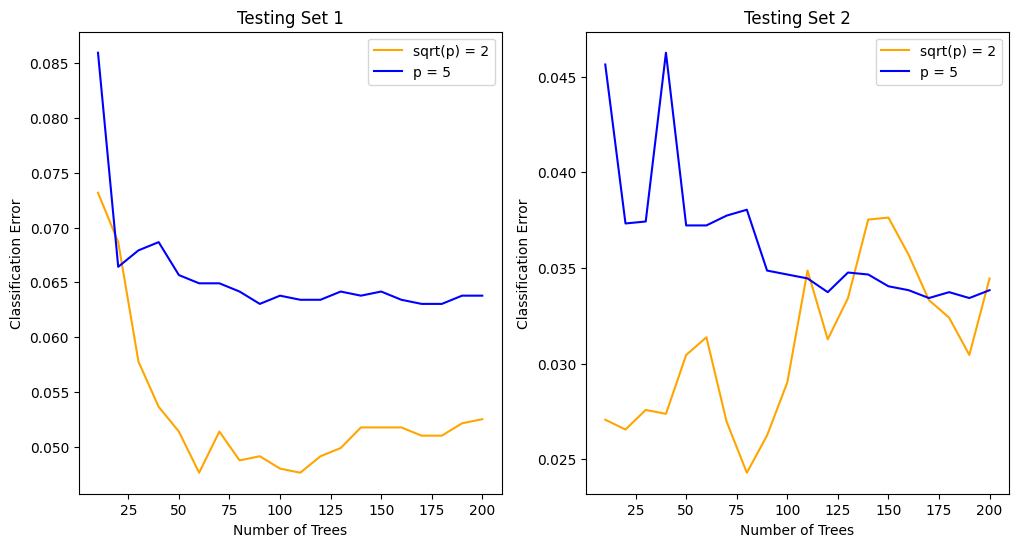

In [19]:
# plot errors for both test set 1 and test set 2
plt.figure(figsize=(12, 6))

colors = ['orange','blue']
labels = ['sqrt(p) = 2', 'p = 5']

for i in range(2):
    plt.subplot(1, 2, 1)
    M1_error = Errors_1[i]
    plt.plot(n_tree_list, M1_error, label = labels[i], color = colors[i])
    plt.title('Testing Set 1')
    plt.xlabel('Number of Trees')
    plt.ylabel('Classification Error')
    plt.legend()

    plt.subplot(1, 2, 2)
    M2_error = Errors_2[i]
    plt.plot(n_tree_list, M2_error, label = labels[i], color = colors[i])
    plt.title('Testing Set 2')
    plt.xlabel('Number of Trees')
    plt.ylabel('Classification Error')
    plt.legend()

plt.show()

Looking at the error plots for testing set 1 and testing set 2, we can observe that using less features in the Random Forest Classifier model results in lower classification error. In particular, having the features set to the square root of the max number of features $(\sqrt{5} = 2)$ results in classification errors much lower than features equal to 5. We can also observe that the optimal number of trees to use in the Random Forest Classifier is around 60 for testing set 1 and around 80 for testing set 2 as the minimum classification error is attained at the values.

For a general model, we aim to select the hyperparameters that minimize classification error across all datasets. Based on the findings, we would choose 2 features (the square root of the total number of features) and 60-80 trees as a good balance between model complexity and predictive performance.

**Analysis**

To evaluate the performance of the optimized Random Forest Classifier, we can compare the model to the baseline model. For our optimized Random Forest Classifier, we known from the optimization step that using 2 features greatly reduces the classification error comapred to the baseline's 5 features. We also know that using 60-80 trees also results in the minimum error. Thus for our optimized Random Forest Classifier, we will use `max_features=sqrt(5)=2` and `n_estimators=80`.

In [20]:
# create Random Forest Classifier (optimized)
rf_optimized = RandomForestClassifier(max_features=2, n_estimators=80, random_state=1)
rf_optimized.fit(X_train, y_train)

# make predictions on testing data
y_pred1 = rf_optimized.predict(X_test1)
y_pred2 = rf_optimized.predict(X_test2)

# calculate accuracy
accuracy_test1 = accuracy_score(y_test1, y_pred1)
accuracy_test2 = accuracy_score(y_test2, y_pred2)

print(f"Test 1 Accuracy (Optimized): {accuracy_test1}")
print(f"Test 2 Accuracy (Optimized): {accuracy_test2}")

Test 1 Accuracy (Optimized): 0.9512195121951219
Test 2 Accuracy (Optimized): 0.9756972928630024


The baseline accuracy for Test Set 1 and Test Set 2 was

In [21]:
# create Random Forest Classifier (baseline)
rf_baseline = RandomForestClassifier(max_features=5, n_estimators=100, random_state=1)
rf_baseline.fit(X_train, y_train)

# make predictions on testing data
y_pred1 = rf_baseline.predict(X_test1)
y_pred2 = rf_baseline.predict(X_test2)

# calculate accuracy
accuracy_test1 = accuracy_score(y_test1, y_pred1)
accuracy_test2 = accuracy_score(y_test2, y_pred2)

print(f"Test 1 Accuracy (Baseline): {accuracy_test1}")
print(f"Test 2 Accuracy (Baseline): {accuracy_test2}")

Test 1 Accuracy (Baseline): 0.9362101313320825
Test 2 Accuracy (Baseline): 0.9653404429860541


Comparing the accuracy for the optimized model and the baseline model, we can see that the optimized model has greater accuracy for both test set 1 and 2. This means that the optimized Random Forest Classifier outperforms the baseline model and has higher adaptability to different room conditions.

An important factor that led to error reduction in the optimized Random Forest Classifier was feature reduction. By reducing the number of features used, the model is able to avoid overfitting, leading to improved accuracy. Another factor that led to increased accuracy was the use of an optimal number of trees, as this parameter allows the model to achieve an balance between underfitting and overfitting.

To get a better understanding of the optimized Random Forest Classifier, we can see which features the model considers as important inside the decision trees.

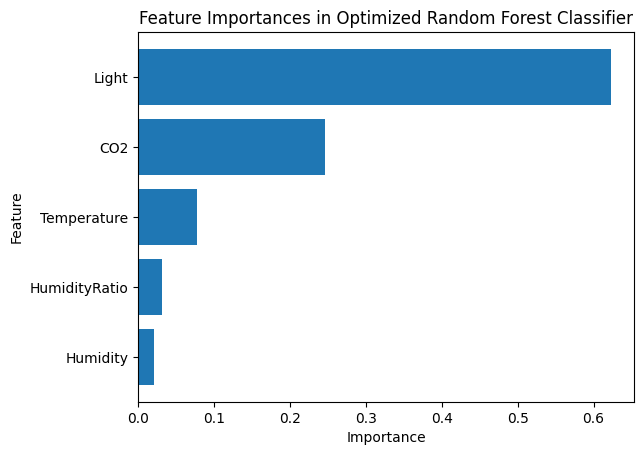

In [22]:
# access the feature importances
importances = rf_optimized.feature_importances_

# create a dataframe for feature importances
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# plot feature importances
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Optimized Random Forest Classifier')
plt.gca().invert_yaxis()
plt.show()

From the feature importances attribute of our optimized Random Forest Classifier, we can observe that the two most important features used in prediciting room occupancy are the Light and CO2 variables. Light has an importance level of around 0.6 and CO2 has a importance level around 0.25. The other three variables all have an importance level less than 0.1. Using this information, we can understand why an optimized Random Forest Classifier that focuses on the two most important features (Light and CO2) outperforms the baseline model, which includes all five features, many of which contribute minimally to the prediction.